In [55]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd
%matplotlib inline

In [56]:
data_df = pd.read_excel('./Data_Case II.xlsx', index_col='Date')
data_df.head()

,Equity,Fixed income,Commodities,Real Estate,Hedge Funds
Date,,,,,
2004-12-31,0.000000,0.000000,0.000000,0.000000,0.000000
2005-01-07,0.014354,0.019900,0.061548,-0.007989,0.028100
2005-01-14,-0.003776,0.003577,0.037780,-0.007760,-0.003210
2005-01-21,-0.007996,0.001278,0.007729,0.009977,0.001171
2005-01-28,0.006571,0.002871,-0.013148,-0.018529,0.001559


In [57]:
data = pd.DataFrame.as_matrix(data_df).transpose()

In [58]:
print(data)

[[ 0.          0.014354   -0.0037758  ...,  0.00450947 -0.00674308
  -0.01102474]
 [ 0.          0.0199      0.00357682 ...,  0.00310794 -0.00409985
  -0.00546529]
 [ 0.          0.061548    0.03777973 ...,  0.01962015  0.01411225
  -0.03241844]
 [ 0.         -0.007989   -0.00775999 ...,  0.00658097  0.01325018
  -0.00803647]
 [ 0.          0.0281     -0.0032098  ...,  0.00161738 -0.00768935
  -0.01813251]]


In [67]:
return_vec = data

In [68]:
## NUMBER OF ASSETS
n_assets = 5

## NUMBER OF OBSERVATIONS
n_obs = 673

Text(0,0.5,'returns')

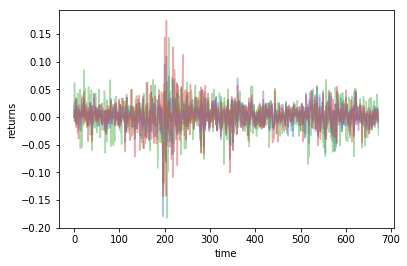

In [69]:
plt.plot(return_vec.T, alpha=.4);
plt.xlabel('time')
plt.ylabel('returns')

In [71]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

print(rand_weights(n_assets))
print(rand_weights(n_assets))

[ 0.14623138  0.30660279  0.4248252   0.04537938  0.07696125]
[ 0.2206769   0.17381955  0.121932    0.38039964  0.10317191]


In [72]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return( random_portfolio(returns))
    return( mu, sigma)

In [74]:
n_portfolios = 500
means, stds = np.column_stack([
    random_portfolio(return_vec) 
    for _ in range(n_portfolios)
])

Text(0.5,1,'Mean and standard deviation of returns of randomly generated portfolios')

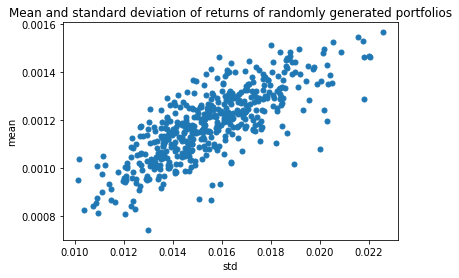

In [75]:
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')

     pcost       dcost       gap    pres   dres
 0: -1.1636e-03 -1.0018e+00  1e+00  2e-16  3e+00
 1: -1.1641e-03 -1.1781e-02  1e-02  1e-16  3e-02
 2: -1.2072e-03 -1.8800e-03  7e-04  7e-17  2e-03
 3: -1.7463e-03 -1.9929e-03  2e-04  4e-16  3e-04
 4: -1.7686e-03 -1.7757e-03  7e-06  1e-16  7e-06
 5: -1.7734e-03 -1.7735e-03  7e-08  3e-16  7e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1623e-03 -1.0018e+00  1e+00  1e-16  3e+00
 1: -1.1628e-03 -1.1779e-02  1e-02  2e-16  3e-02
 2: -1.2056e-03 -1.8777e-03  7e-04  1e-16  2e-03
 3: -1.7440e-03 -1.9899e-03  2e-04  3e-16  3e-04
 4: -1.7655e-03 -1.7726e-03  7e-06  1e-16  7e-06
 5: -1.7703e-03 -1.7704e-03  7e-08  1e-16  7e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1607e-03 -1.0018e+00  1e+00  2e-16  3e+00
 1: -1.1612e-03 -1.1776e-02  1e-02  2e-16  3e-02
 2: -1.2039e-03 -1.8751e-03  7e-04  7e-17  2e-03
 3: -1.7414e-03 -1.9866e-03  2e-04  1e-16  2e-04
 4: -1.7621e-03 -1.7690e

 4: -5.0790e-04 -5.7736e-04  7e-05  2e-17  6e-19
 5: -5.3037e-04 -5.3577e-04  5e-06  1e-16  2e-19
 6: -5.3278e-04 -5.3297e-04  2e-07  1e-16  6e-19
 7: -5.3285e-04 -5.3285e-04  2e-09  2e-16  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.9720e-04 -1.0018e+00  1e+00  0e+00  3e+00
 1:  3.9388e-04 -1.1837e-02  1e-02  7e-17  3e-02
 2:  1.8901e-04 -1.5986e-03  2e-03  1e-16  5e-03
 3: -3.7751e-04 -9.0249e-04  5e-04  2e-16  5e-19
 4: -4.3750e-04 -5.1012e-04  7e-05  2e-16  4e-19
 5: -4.6129e-04 -4.6707e-04  6e-06  1e-16  8e-19
 6: -4.6384e-04 -4.6403e-04  2e-07  2e-16  8e-19
 7: -4.6394e-04 -4.6394e-04  2e-09  2e-16  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.8719e-04 -1.0020e+00  1e+00  2e-16  3e+00
 1:  5.8281e-04 -1.1954e-02  1e-02  6e-17  3e-02
 2:  3.2619e-04 -1.6347e-03  2e-03  1e-16  5e-03
 3: -2.9434e-04 -8.5815e-04  6e-04  2e-16  2e-18
 4: -3.6045e-04 -4.3525e-04  7e-05  1e-16  4e-19
 5: -3.8549e-04 -3.9154

 0:  5.2073e-02 -1.0212e+00  1e+00  2e-16  3e+00
 1:  4.7250e-02 -2.4059e-02  7e-02  1e-16  2e-01
 2:  2.7271e-02  1.0218e-02  2e-02  4e-16  3e-17
 3:  2.4982e-02  2.3625e-02  1e-03  3e-16  2e-17
 4:  2.4472e-02  2.4327e-02  1e-04  1e-16  8e-18
 5:  2.4392e-02  2.4381e-02  1e-05  1e-16  8e-18
 6:  2.4383e-02  2.4383e-02  4e-07  1e-16  6e-18
 7:  2.4383e-02  2.4383e-02  4e-09  2e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.7117e-02 -1.0216e+00  1e+00  2e-16  3e+00
 1:  5.1528e-02 -2.3201e-02  7e-02  1e-16  2e-01
 2:  3.0527e-02  1.3194e-02  2e-02  1e-16  7e-17
 3:  2.8106e-02  2.6758e-02  1e-03  1e-16  2e-17
 4:  2.7558e-02  2.7428e-02  1e-04  2e-16  2e-17
 5:  2.7485e-02  2.7475e-02  1e-05  2e-16  3e-17
 6:  2.7477e-02  2.7477e-02  3e-07  1e-16  3e-17
 7:  2.7477e-02  2.7477e-02  3e-09  2e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.2567e-02 -1.0217e+00  1e+00  3e-16  3e+00
 1:  5.6136e-02 -2.1913

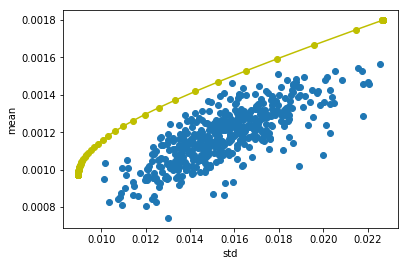

In [76]:
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return( np.asarray(wt), returns, risks)

weights, returns, risks = optimal_portfolio(return_vec)

plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')

In [77]:
print(weights)

[[  9.99647233e-01]
 [  4.48329004e-06]
 [  1.86492307e-06]
 [  3.40412247e-04]
 [  6.00638167e-06]]


In [96]:
summ = 0
for i in weights:
    summ += i[0]
print(summ)

1.0
